In [1]:
import numpy as np
class AdalineGD(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    def activation(self, X):
        """Линейная активация"""
        return X
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X)>=0.0, 1, -1) # если больше 0 - то 1. если меньше нуля -1

In [4]:
import pandas as pd
df = pd.read_csv('iris/iris.data' ,header=None, encoding=' utf-8' ) 
df.tail()
# 0 - длина чашелистика
# 1 - шрирна чашелистика
# 2 - длина лепестка
# 3 - ширина лепестка
# 4 - название

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


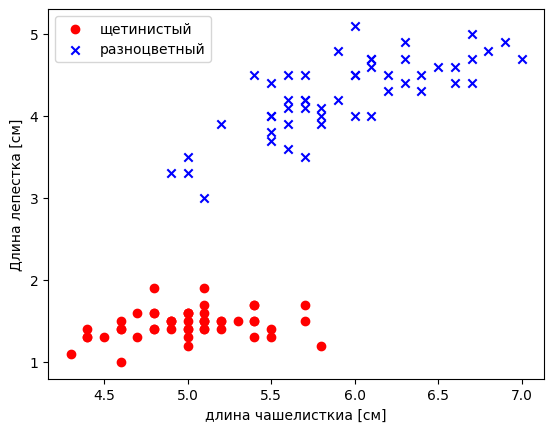

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# создаем обучающую выборку из 100 записей. X - признаки, Y - метки
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x',label='разноцветный')
plt.xlabel('длина чашелисткиа [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()


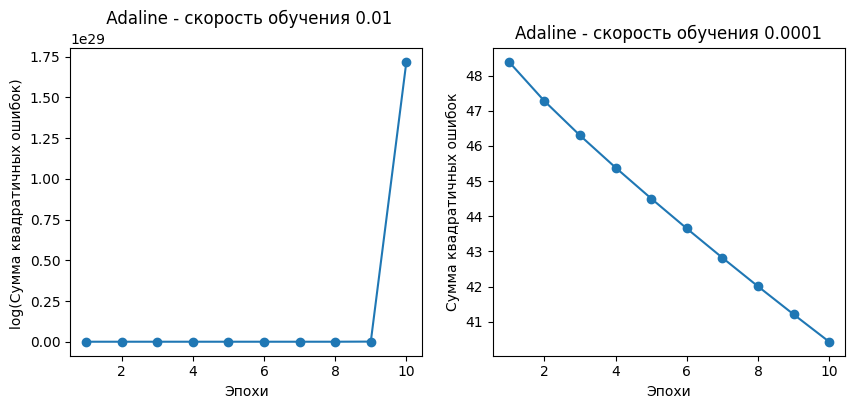

In [30]:
import matplotlib.pyplot as plt
fig , ax= plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range (1 , len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax[0] .set_xlabel ('Эпохи')
ax[0].set_ylabel('log(Cyммa квадратичных ошибок) ')
ax[0].set_title(' Adaline - скорость обучения 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001) . fit(X, y)
ax[1] .plot(range (1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1] .set_xlabel('Эпохи')
ax[1] .set_ylabel('Cyммa квадратичных ошибок')
ax[1] .set_title('Adaline - скорость обучения 0.0001')
plt.show () 

In [31]:
ada1.cost_

[np.float64(48.39602654464427),
 np.float64(313.59446945597597),
 np.float64(684941.4244799673),
 np.float64(1508167386.1062133),
 np.float64(3320889806457.949),
 np.float64(7312388129926519.0),
 np.float64(1.610141367982778e+19),
 np.float64(3.545428905599081e+22),
 np.float64(7.806809001154888e+25),
 np.float64(1.7190096996236432e+29)]

In [25]:
ada2.cost_

[np.float64(48.39602654464427),
 np.float64(47.27597780427916),
 np.float64(46.2978235254992),
 np.float64(45.383091390328346),
 np.float64(44.504514316598126),
 np.float64(43.65148807086433),
 np.float64(42.819361295670674),
 np.float64(42.005838841287535),
 np.float64(41.209649419542615),
 np.float64(40.43000018688283)]